# Machine Learning 2023/2024

## First Home Assignment

**Group Number:** 10

**Group Elements:**
- André Santos (fc53323)
- Filipe Santos (fc53304)
- João Martins (fc62532)
- Rúben Torres (fc62531)

**Hours Worked:**
- André Santos (10h)
- Filipe Santos (10h)
- João Martins (10h)
- Rúben Torres (10h)

### Imports

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from statsmodels.api import OLS, add_constant
import matplotlib.pyplot as plt
from sklearn.metrics import explained_variance_score, mean_squared_error, max_error, mean_absolute_error
from scipy.stats import pearsonr
from sklearn import tree
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

### Loading the Dataset

In [3]:
df = pd.read_csv("HA1-DatasetScaled.tsv", sep="\t")
df

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,-2.1737,-2.5469,-1.8316,-1.9110,-1.2742,-3.2043,-2.6712,-2.1218,-1.2523,-2.2206,...,0.7124,0.9014,0.8055,-3.3123,-2.7858,-1.6406,-1.5235,-1.7297,-1.4782,52.000
1,-2.1737,-2.5469,-1.8316,-1.9110,-1.2742,-3.2043,-2.6712,-2.1218,-1.2523,-2.2206,...,0.7124,0.9014,0.8055,-3.3123,-2.7858,-1.6406,-1.5235,-1.7297,-1.4782,50.000
2,-2.1737,-2.5469,-1.8316,-1.9110,-1.2742,-3.2043,-2.6712,-2.1218,-1.2523,-2.2206,...,0.7124,0.9014,0.8055,-3.3123,-2.7858,-1.6406,-1.5235,-1.7297,-1.4782,41.500
3,-2.1737,-2.5469,-1.8316,-1.9110,-1.2742,-3.2043,-2.6712,-2.1218,-1.2523,-2.2206,...,0.7124,0.9014,0.8055,-3.3123,-2.7858,-1.6406,-1.5235,-1.7297,-1.4782,32.000
4,-2.1737,-1.5994,-0.9850,-1.0041,-0.5006,-3.2043,-2.6712,-2.1218,-1.2523,-2.2206,...,-0.9684,-1.0090,-0.8995,-3.3123,-2.7858,-1.6406,-1.5235,-1.7297,-1.4782,29.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21169,-1.4777,-1.5696,-1.3792,-1.0551,-0.8610,-1.4650,-2.6345,-1.6094,-0.2289,-1.5220,...,-0.1272,0.3895,-0.0463,-1.5698,-2.7590,-0.8366,1.5587,-0.6981,-1.4088,0.596
21170,-1.4777,-1.5696,-1.3794,-1.0551,-0.8612,-1.4650,-2.6426,-1.6094,-0.2281,-1.5220,...,-0.1274,0.3895,-0.0465,-1.5698,-2.7649,-0.8366,1.5605,-0.6981,-1.4181,0.700
21171,0.6104,-1.2091,-0.3571,-0.8493,-0.0501,0.8948,-0.0899,-0.8092,0.1210,-1.0294,...,-0.8538,-0.6248,-0.8270,0.5646,0.6106,0.7715,-0.4937,0.7460,-0.1070,73.000
21172,-1.4777,2.3104,3.2518,2.5600,3.2684,-1.3983,-1.7172,-0.6162,3.8693,-0.1679,...,1.2167,0.7801,1.2440,-1.6243,-1.7637,-0.0325,1.9778,0.3334,0.2772,0.280


<h3>Objective 1:<br> Produce the best regression model for critical_temp (Dependent Variable)</h3>

In [4]:
df_x = df.drop("critical_temp", axis = 1)
df_y = df["critical_temp"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df_x.values, 
                                                    df_y.values, 
                                                    random_state=0)

print(X_train.shape)
print(X_test.shape)


(15880, 81)
(5294, 81)


Decision tree Regression model

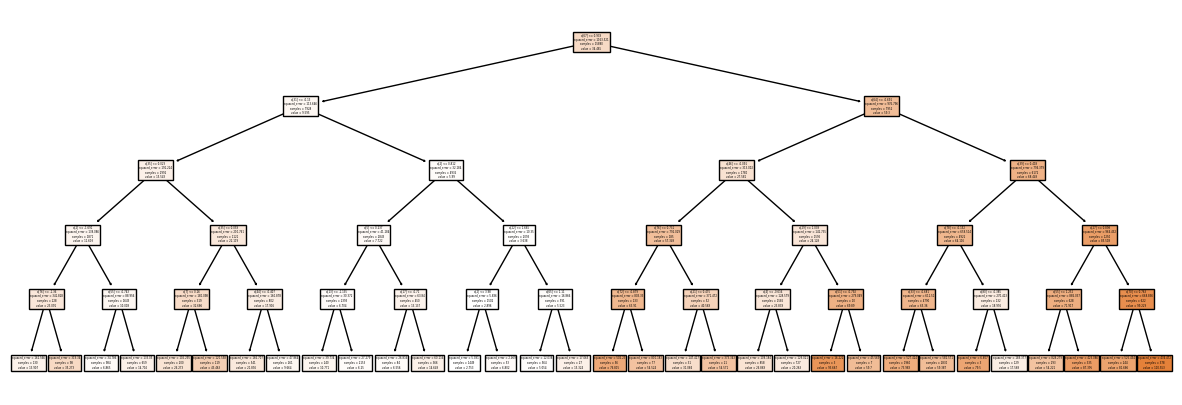

In [6]:
dmdl = DecisionTreeRegressor(max_depth=5)
dmdl.fit(X_train, y_train)

dtr_preds=dmdl.predict(X_test)

#explained_variance_score(y_test, dtr_preds)

plt.figure(figsize=(15, 5))
r=tree.plot_tree(dmdl, filled=True)#, feature_names= df.columns)
plt.show()

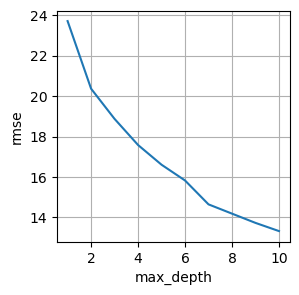

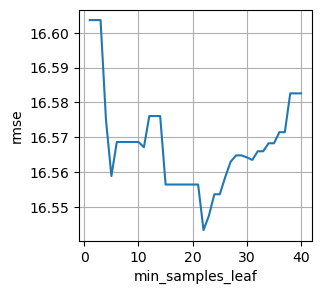

In [20]:
rmses_i = []
rmses_j = []

#def statGraph()
for i in range(1, 11):
    dmdl_i = DecisionTreeRegressor(max_depth=i)
    dmdl_i.fit(X_train, y_train)
    
    preds_i=dmdl_i.predict(X_test)
    #= explained_variance_score(y_test, preds)
    rmses_i.append(mean_squared_error(y_test, preds_i, squared=False))
    
for i in range(1, 41):
    dmdl_j = DecisionTreeRegressor(max_depth=5, min_samples_leaf= i)
    dmdl_j.fit(X_train, y_train)
    
    preds_j=dmdl_j.predict(X_test)
    #= explained_variance_score(y_test, preds)
    rmses_j.append(mean_squared_error(y_test, preds_j, squared=False))

plt.figure(figsize=(3,3))
plt.plot(range(1, 11), rmses_i)
plt.xlabel("max_depth")
plt.ylabel("rmse")
plt.grid()
plt.show()

plt.figure(figsize=(3,3))
plt.plot(range(1, 41), rmses_j)
plt.xlabel("min_samples_leaf")
plt.ylabel("rmse")
plt.grid()
plt.show()

Linear Regression model

In [22]:
reg = LinearRegression()
reg.fit(X_train, y_train)

lr_preds=reg.predict(X_test)

#explained_variance_score(y_test, lr_preds)

Alternative linear regression model using statusmodel implementation

In [23]:
X_tr = add_constant(X_train)
reg2=OLS(y_train,X_tr, hasconst=12).fit()
reg2.summary()

#alr_preds= reg2.predict(X_test)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     550.2
Date:                Thu, 19 Oct 2023   Prob (F-statistic):               0.00
Time:                        16:18:40   Log-Likelihood:                -67939.
No. Observations:               15880   AIC:                         1.360e+05
Df Residuals:                   15798   BIC:                         1.367e+05
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5735      0.139    248.859      0.000      34.301      34.846
x1            -4.9599      1.247     -3.976      0.000      -7.405      -2.515
x2            23.2267      2.831      8.205      0.000      17.678      28.775
x3           -27.5655      3.956     -6.969      0.000     -35.319     -19.812
x4           -13.8199      2.938     -4.704      0.000     -19.579      -8.061
x5            20.6481      4.121      5.010      0.000      12.571      28.726
x6           -12.7071      1.925     -6.599      0.000     -16.481      -8.933
x7             1.8224      1.689      1.079      0.281      -1.489       5.133
x8            12.3533      1.040     11.873      0.000      10.314      14.393
x9             0.5702      0.681      0.837      0.402      -0.765       1.905
x10          -11.1099      1.461     -7.605      0.000     -13.973      -8.247
x11            1.2602      1.270      0.992      0.321      -1.229       3.749
x12           13.4276      6.296      2.133      0.033       1.087      25.768
x13          -25.6596     12.726     -2.016      0.044     -50.604      -0.716
x14          -11.8388      5.576     -2.123      0.034     -22.768      -0.910
x15           24.1836     10.511      2.301      0.021       3.580      44.787
x16          -44.8919      8.890     -5.050      0.000     -62.317     -27.467
x17           15.4199      1.822      8.465      0.000      11.849      18.991
x18           20.4103      2.298      8.882      0.000      15.906      24.915
x19            4.4433      0.938      4.736      0.000       2.604       6.282
x20          -21.6203      2.836     -7.624      0.000     -27.179     -16.062
x21           -1.8759      3.022     -0.621      0.535      -7.799       4.047
x22          -10.8573      4.232     -2.565      0.010     -19.153      -2.561
x23           91.3110      8.066     11.321      0.000      75.501     107.121
x24            5.0213      4.654      1.079      0.281      -4.101      14.144
x25         -100.5243      9.829    -10.228      0.000    -119.789     -81.259
x26           29.3096      7.606      3.853      0.000      14.400      44.219
x27           15.2681      2.469      6.184      0.000      10.429      20.107
x28           10.8068      1.708      6.328      0.000       7.460      14.154
x29           -3.5231      0.641     -5.493      0.000      -4.780      -2.266
x30           -5.8020      2.599     -2.233      0.026     -10.896      -0.708
x31           -8.7377      2.568     -3.403      0.001     -13.771      -3.705
x32          -11.6224      1.642     -7.080      0.000     -14.840      -8.405
x33           -1.7475      2.234     -0.782      0.434      -6.126       2.631
x34            1.4322      2.030      0.705      0.481      -2.547       5.412
x35           11.4623      2.649      4.327      0.000       6.270      16.655
x3

Regularized linear models

Ridge Regression model

In [24]:
ridge = Ridge(alpha=10, max_iter=9999999).fit(X_train, y_train)

print("The bias is: ",  ridge.intercept_)
print("The other parameters are: ")
#for i, beta in enumerate(ridge.coef_):
#    print("\t B%02d -> %9.3f"% (i+1, beta))

ridge_preds=ridge.predict(X_test)

The bias is:  34.57197419584233
The other parameters are: 


Lasso Regression model

In [25]:
lasso = Lasso(alpha=10, max_iter=9999999).fit(X_train, y_train)

print("The bias is: ",  lasso.intercept_)
print("The other parameters are: ")
#for i, beta in enumerate(ridge.coef_):
#    print("\t B%02d -> %9.3f"% (i+1, beta))

lasso_preds= lasso.predict(X_test)

The bias is:  34.46923180502305
The other parameters are: 


Gráficos

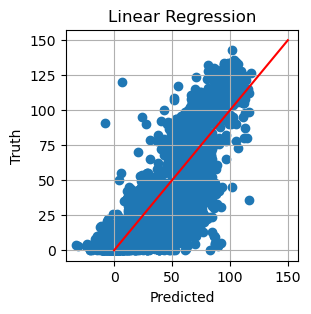

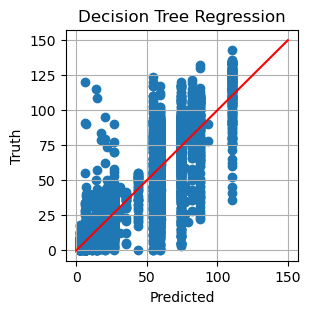

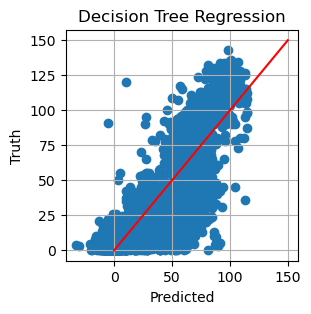

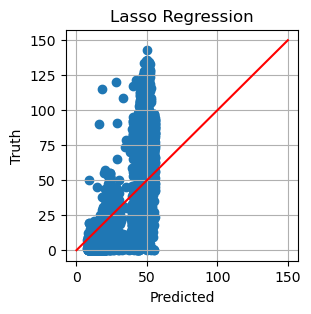

In [29]:
def drawGraf(preds, title):
    plt.figure(figsize=(3,3))
    plt.scatter(preds, y_test)
    plt.plot((0, 150), (0,150), c="r")
    plt.grid()
    plt.xlabel("Predicted")
    plt.ylabel("Truth")
    plt.title(title)
    plt.show()


#####  Gráfico linear regression #########
drawGraf(lr_preds, "Linear Regression")

#####  Gráfico decision tree regression #########
drawGraf(dtr_preds, "Decision Tree Regression")

#####  Gráfico ridge regression #########
drawGraf(ridge_preds, "Decision Tree Regression")

#####  Gráfico lasso regression #########
drawGraf(lasso_preds, "Lasso Regression")

In [11]:
def printAvalStat(truth, preds):
    print("The RVE is: ", explained_variance_score(truth, preds))
    print("The rmse is: ", mean_squared_error(truth, preds, squared=False))
    corr, pval=pearsonr(truth, preds)
    print("The Correlation Score is: %6.4f (p-value=%e)"%(corr,pval))

    print("The Maximum Error is: ", max_error(truth, preds))
    print("The Mean Absolute Error is:", mean_absolute_error(truth, preds),"\n")

In [12]:
###############   Métricas de avaliação de decision tree regression
print("Métricas de avaliação de decision tree regression:")
printAvalStat(y_test, dtr_preds)

###############   Métricas de avaliação de linear regression
print("Métricas de avaliação de linear regression:")
printAvalStat(y_test, lr_preds)

###############   Métricas de avaliação de ridge regression
print("Métricas de avaliação de ridge regression:")
printAvalStat(y_test, ridge_preds)

###############   Métricas de avaliação de lasso regression
print("Métricas de avaliação de lasso regression:")
printAvalStat(y_test, lasso_preds)

Métricas de avaliação de decision tree regression:
The RVE is:  0.7708561360799856
The rmse is:  16.603632864684805
The Correlation Score is: 0.8780 (p-value=0.000000e+00)
The Maximum Error is:  113.7497025081282
The Mean Absolute Error is: 11.161233240250313 

Métricas de avaliação de linear regression:
The RVE is:  0.7325549159767302
The rmse is:  17.937738866851145
The Correlation Score is: 0.8559 (p-value=0.000000e+00)
The Maximum Error is:  113.18917082049799
The Mean Absolute Error is: 13.564847251223169 

Métricas de avaliação de ridge regression:
The RVE is:  0.7288058231484296
The rmse is:  18.06300703568197
The Correlation Score is: 0.8537 (p-value=0.000000e+00)
The Maximum Error is:  109.93960911427271
The Mean Absolute Error is: 13.663599574439479 

Métricas de avaliação de lasso regression:
The RVE is:  0.45253310961860427
The rmse is:  25.66666247668268
The Correlation Score is: 0.7426 (p-value=0.000000e+00)
The Maximum Error is:  97.0290138486915
The Mean Absolute Error 

<h3>Objective 2:<br>Produce the best binary classification model assuming as positive all instances with values of critical_temp >= 80.0 and as negatives all remaining cases</h3>

Decision tree classifier

In [13]:
########## Reclassificação dos valores de Critical_temp em classes discretas ###########

df_critical = df

#print(df_critical.values[0, 81])

if df_critical.values[0, 81] == 52.0:
    df_critical['critical_temp'] = df_critical['critical_temp'].apply(
        lambda x:0 if x < 80 else    #"negative"
        1    #"positive"
    )

df_crit_x = df_critical.drop("critical_temp", axis = 1)
df_crit_y = df_critical["critical_temp"]

In [29]:
X_crit_train, X_crit_test, y_crit_train, y_crit_test = train_test_split(df_crit_x.values, 
                                                    df_crit_y.values, test_size=0.33,
                                                    random_state=22)   #test_size=0.2, random_state=22


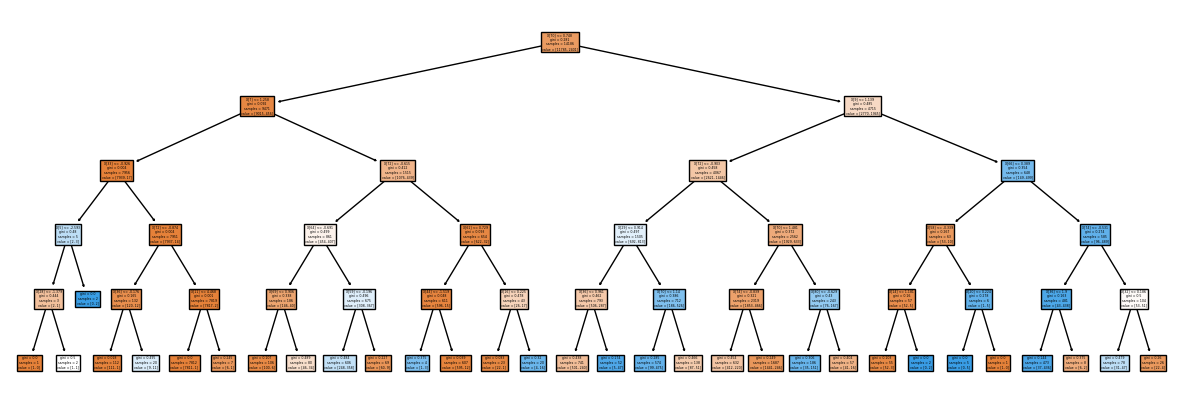

In [30]:
dt = tree.DecisionTreeClassifier(max_depth=5) #parametros no construtor
dt = dt.fit(X_crit_train , y_crit_train)

plt.figure(figsize=(15, 5))
r=tree.plot_tree(dt, filled=True)#, feature_names= df.columns)
plt.show()

In [15]:
dt_preds= dt.predict(X_crit_test)

Logistic regression classification model

scaler = StandardScaler()
scaler.fit(X_crit_train)
X_crit_train = scaler.transform(X_crit_train)
X_crit_test = scaler.transform(X_crit_test)

In [16]:
scaler = StandardScaler()

scaler.fit(X_crit_train)
X_crit_train_s = scaler.transform(X_crit_train)
X_crit_test_s = scaler.transform(X_crit_test)

#X_crit_train_s = scaler.transform(X_crit_train_s)
#X_crit_test_s = scaler.transform(X_crit_test_s)

In [17]:
#lrmdl = LogisticRegression(random_state=0)
#lrmdl.fit(X_crit_train_s, y_crit_train)

lrmdl = LogisticRegression(random_state=0, max_iter=999999).fit(X_crit_train_s, y_crit_train)

sk_preds=lrmdl.predict(X_crit_test_s)


#b0=mdl.intercept_[0]
#b1=mdl.coef_[0][0]
#print("Intercept (b0): %7.4f"% b0) 
#print("Slope     (b1): %7.4f"% b1) 

In [26]:
def printClassResults(truth, preds):
    print("The Accuracy is: %7.4f" % accuracy_score(truth, preds))
    print("The Precision is: %7.4f" % precision_score(truth, preds))
    print("The Recall is: %7.4f" % recall_score(truth, preds))
    print("The F1 score is: %7.4f" % f1_score(truth, preds))
    print("The Matthews correlation coefficient is: %7.4f" % matthews_corrcoef(truth, preds))
    print()
    print("This is the Confusion Matrix")
    print("0 = negative & 1 = positive:\n")
    print(pd.DataFrame(confusion_matrix(truth, preds)))
    print("\n")

In [28]:
### Resultados da avaliação do modelo decision tree classifier ###
print("Resultados da avaliação do modelo decision tree classifier:\n")
printClassResults(y_crit_test, dt_preds)

### Resultados da avaliação do modelo logistic regression ###
print("Resultados da avaliação do modelo logistic regression:\n")
printClassResults(y_crit_test, sk_preds)

Resultados da avaliação do modelo decision tree classifier:

The Accuracy is:  0.8570
The Precision is:  0.7292
The Recall is:  0.2064
The F1 score is:  0.3218
The Matthews correlation coefficient is:  0.3367

This is the Confusion Matrix
0 = negative & 1 = positive:

      0    1
0  5752   88
1   911  237


Resultados da avaliação do modelo logistic regression:

The Accuracy is:  0.8947
The Precision is:  0.7036
The Recall is:  0.6202
The F1 score is:  0.6593
The Matthews correlation coefficient is:  0.5989

This is the Confusion Matrix
0 = negative & 1 = positive:

      0    1
0  5540  300
1   436  712




In [ ]:
#####  Gráfico decision tree classifier #########


In [21]:
###############   Métricas de avaliação de decision tree classifier
print("Métricas de avaliação de decision tree classifier:")



Métricas de avaliação de decision tree classifier:
